Di dalam portofolio ini saya menggunakan contoh sebuah studi kasus berupa data dummy dengan latar belakang sebagai berikut
Saat ini kampus ABC sedang mengadakan survey kepuasan ke para mahasiswa untuk meningkatkan kualitas pelayanan mereka. Lalu buatlah analisis dari hasil survey tersebut.



In [64]:
# Disini yang pertama kali saya lakukan adalah menginstall library dan menghubungkan google colaboratory
#  dengan drive agar bisa mengambil dataset dari BigQuery nantinya
!pip install -U pandasql
import numpy as np
import os
import pandas as pd
from google.cloud import bigquery
from google.colab import drive
drive.mount('/content/drive')
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/uas/private-key.json"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
bqclient = bigquery.Client()

In [35]:
#Prepare data dari BigQuery ke Colab dengan private key dan memasukkan tabel data (main_data dan status) dari BigQuery menggunakan private key
# Disini saya menncoba untuk menyiapkan data satu per satu ke dalam colaboratory lalu saya gabungkan diakhir ketika data sudah bersih
query1 = """
SELECT * FROM `bitlabs-dab.finalexam.main_data`
"""

main_data = (

bqclient.query(query1)
.result()
.to_dataframe()

)
main_data

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender
0,C000295,ASR,I'm finding the academic workload really overw...,None,0.69,1,1,F
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,None,3.71,1,1,M
2,C000184,ASR,The limited access to academic advisors is mak...,None,3.56,1,1,F
3,C000256,ASR,I am finding it difficult to complete my assig...,None,2.45,1,1,F
4,C000320,ASR,The stress and anxiety of college life has bee...,None,3.52,1,1,M
...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27,3.09,5,1,F
1005,C001478,STA,"""The lack of transparency in the student affai...",27,2.37,5,1,M
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27,2.66,5,1,M
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27,0.03,5,1,F


In [36]:
# Setelah mendapatkan tabel data pertama dari BigQuery pada tabel main data,
# saya mencoba melihat sebaran kolom dan informasi mengenai tabel main data tersebut
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   complaint_ID         1009 non-null   object
 1   type_complaint_code  1009 non-null   object
 2   reports              1009 non-null   object
 3   age                  981 non-null    object
 4   gpa                  1009 non-null   object
 5   year                 1009 non-null   object
 6   count                1009 non-null   object
 7   gender               1009 non-null   object
dtypes: object(8)
memory usage: 63.2+ KB


In [37]:
# Lalu saya mencari mencari kolom data yang null selanjutnya mengubah data null
main_data.isnull().sum()
# disini dapat dilihat terdapat data yang null pada kolom age yang harus ditangani

complaint_ID            0
type_complaint_code     0
reports                 0
age                    28
gpa                     0
year                    0
count                   0
gender                  0
dtype: int64

In [38]:
from IPython.utils.text import string
# Sebelum itu saya mengubah tipe data terlebih dahulu menjadi numeric agar bisa dikalkulasi
main_data['gpa'] = pd.to_numeric(main_data['gpa'])
main_data['age'] = pd.to_numeric(main_data['age'])
main_data['year'] = pd.to_numeric(main_data['year'])
main_data['count'] = pd.to_numeric(main_data['count'])
main_data

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender
0,C000295,ASR,I'm finding the academic workload really overw...,NaN,0.69,1,1,F
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,NaN,3.71,1,1,M
2,C000184,ASR,The limited access to academic advisors is mak...,NaN,3.56,1,1,F
3,C000256,ASR,I am finding it difficult to complete my assig...,NaN,2.45,1,1,F
4,C000320,ASR,The stress and anxiety of college life has bee...,NaN,3.52,1,1,M
...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27.0,3.09,5,1,F
1005,C001478,STA,"""The lack of transparency in the student affai...",27.0,2.37,5,1,M
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27.0,2.66,5,1,M
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27.0,0.03,5,1,F


In [39]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaint_ID         1009 non-null   object 
 1   type_complaint_code  1009 non-null   object 
 2   reports              1009 non-null   object 
 3   age                  981 non-null    float64
 4   gpa                  1009 non-null   float64
 5   year                 1009 non-null   int64  
 6   count                1009 non-null   int64  
 7   gender               1009 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 63.2+ KB


In [40]:
# Setelah mengetahui kolom data yang null selanjutnya adalah melihat nilai mean dan median dari kolom age untuk mereplace isi kolom yang null
mean = main_data.mean(numeric_only=True)
median = main_data.median(numeric_only=True)
print('Mean:')
print(mean)

print('\nMedian:')
print(median)
# karena nilai mean dan mediannya dekat maka data terdistribusi secara normal

Mean:
age      21.302752
gpa       2.089058
year      2.686819
count     1.000000
dtype: float64

Median:
age      21.00
gpa       2.11
year      2.00
count     1.00
dtype: float64


<Axes: ylabel='Density'>

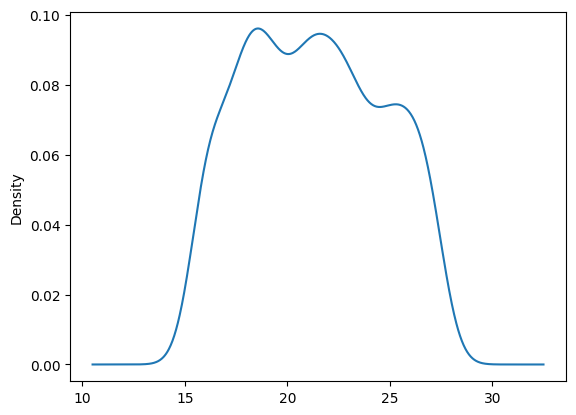

In [41]:
# Melihat persebaran data pada kolom age dengan grafik distribusi normal karena data pada kolom age terdistribusi normal
#  akibatnya kita mengganti nilai null dengan mean dari kolom age
main_data['age'].plot(kind='kde')

In [42]:
#mencari nilai mean dan mengganti null ke nilai mean di kolom age
mean_age = main_data['age'].mean()
main_data['age'] = main_data['age'].fillna(mean_age)
main_data

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender
0,C000295,ASR,I'm finding the academic workload really overw...,21.302752,0.69,1,1,F
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21.302752,3.71,1,1,M
2,C000184,ASR,The limited access to academic advisors is mak...,21.302752,3.56,1,1,F
3,C000256,ASR,I am finding it difficult to complete my assig...,21.302752,2.45,1,1,F
4,C000320,ASR,The stress and anxiety of college life has bee...,21.302752,3.52,1,1,M
...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27.000000,3.09,5,1,F
1005,C001478,STA,"""The lack of transparency in the student affai...",27.000000,2.37,5,1,M
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27.000000,2.66,5,1,M
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27.000000,0.03,5,1,F


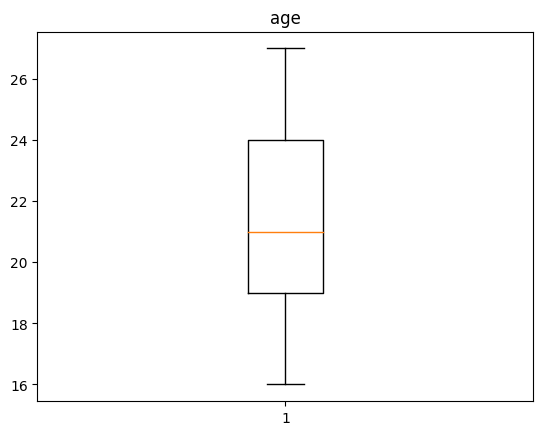

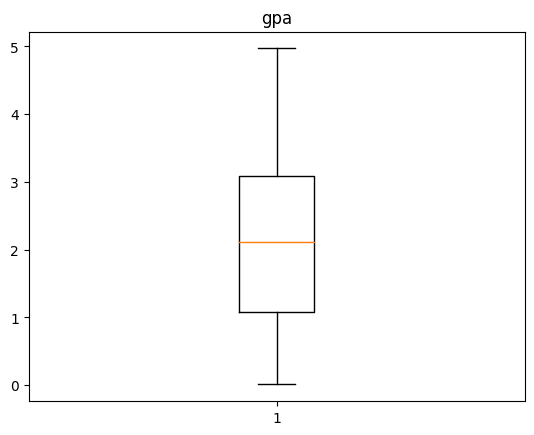

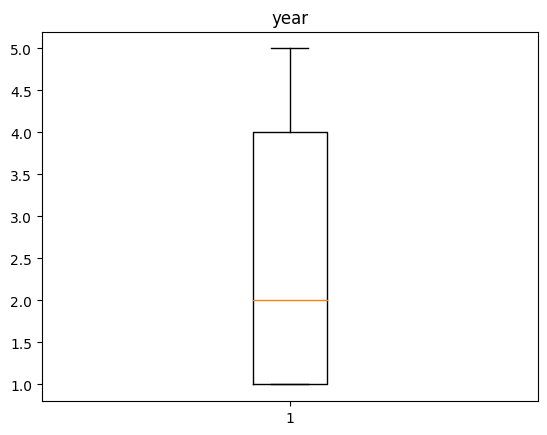

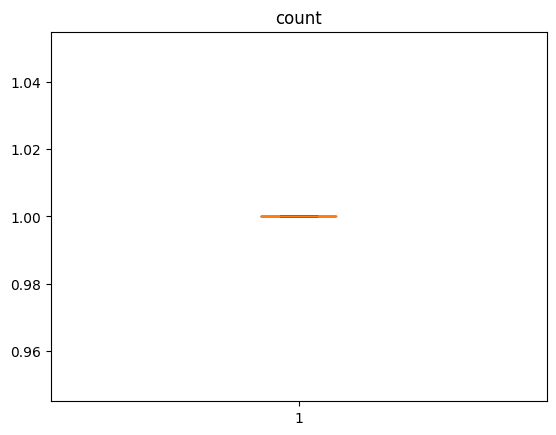

In [43]:
# Selanjutnya adalah melihat sebaran pada setiap kolom apakah terdapat kolom yang memiliki outlier
# Select only the numerical columns
num_cols = main_data.select_dtypes(include=['int64', 'float64']).columns
# Plot boxplots for each numerical column
for col in num_cols:
  if col != 'ID':
    plt.boxplot(main_data[col])
    plt.title(col)
    plt.show()

In [44]:
#Dapat dilihat bahwa data tidak memiliki Outlier


In [45]:
# Lalu selanjutnya adalah memasukkan table kedua dari Bigquery yaitu tabel status dari bigquery kedalam dataframe
query2 = """
SELECT * FROM `bitlabs-dab.finalexam.status`
"""

dfstatus = (

bqclient.query(query2)
.result()
.to_dataframe()

)
dfstatus

,complaint-ID,status
0,C000269,None
1,C000014,None
2,C000152,None
3,C000442,None
4,C000485,None
...,...,...
1000,C100951,PROCESS
1001,C101197,PROCESS
1002,C101882,PROCESS
1003,C101998,PROCESS


In [46]:
dfstatus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complaint-ID  1005 non-null   object
 1   status        987 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [47]:
# Selanjutnya adalah melihat sebaran nul dari status
dfstatus.isnull().sum()


complaint-ID     0
status          18
dtype: int64

In [48]:
# Selanjutnya karena karakteristik kolom data yang null merupakan kategorikal maka kita mengisi kolom data yang null dengan modus dari kolom status
mode1 = dfstatus['status'].mode()[0]
dfstatus['status'] = dfstatus['status'].fillna(mode1)
dfstatus

,complaint-ID,status
0,C000269,CLOSE
1,C000014,CLOSE
2,C000152,CLOSE
3,C000442,CLOSE
4,C000485,CLOSE
...,...,...
1000,C100951,PROCESS
1001,C101197,PROCESS
1002,C101882,PROCESS
1003,C101998,PROCESS


In [49]:
# Selanjutnya adalah menggabungkan tabel main data dengan status untuk melakukan analisis lebih lanjut
df = main_data.merge(dfstatus, left_on='complaint_ID', right_on='complaint-ID')
df

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,complaint-ID,status
0,C000295,ASR,I'm finding the academic workload really overw...,21.302752,0.69,1,1,F,C000295,PROCESS
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21.302752,3.71,1,1,M,C100455,CLOSE
2,C000184,ASR,The limited access to academic advisors is mak...,21.302752,3.56,1,1,F,C000184,OPEN
3,C000256,ASR,I am finding it difficult to complete my assig...,21.302752,2.45,1,1,F,C000256,CLOSE
4,C000320,ASR,The stress and anxiety of college life has bee...,21.302752,3.52,1,1,M,C000320,PROCESS
...,...,...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27.000000,3.09,5,1,F,C000995,PROCESS
1005,C001478,STA,"""The lack of transparency in the student affai...",27.000000,2.37,5,1,M,C001478,OPEN
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27.000000,2.66,5,1,M,C001549,CLOSE
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27.000000,0.03,5,1,F,C001241,PROCESS


In [50]:
# Selanjutnya adalah mengecek apakah didalam data terdapat nilai kolom yg duplikat dan menghapusnya
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaint_ID         1009 non-null   object 
 1   type_complaint_code  1009 non-null   object 
 2   reports              1009 non-null   object 
 3   age                  1009 non-null   float64
 4   gpa                  1009 non-null   float64
 5   year                 1009 non-null   int64  
 6   count                1009 non-null   int64  
 7   gender               1009 non-null   object 
 8   complaint-ID         1009 non-null   object 
 9   status               1009 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 86.7+ KB


In [51]:
# Selanjutnya adalah memasukan tabel data ketiga yaitu tabel detail kedalam data frame dan menggabungkan dengan dataframe yang sudah ada
query3 = """
SELECT * FROM `bitlabs-dab.finalexam.detail`
"""

detail = (

bqclient.query(query3)
.result()
.to_dataframe()

)
detail

,type_complaint_code,type_complaint
0,ASR,Academic Support and Resources
1,ANS,Athletics and sports
2,ANT,Activities and Travelling
3,CRO,Career opportunities
4,FNC,Food and Cantines
5,FNS,Financial Support
6,HNT,Housing and Transportation
7,HWS,Health and Well-being Support
8,ISE,International student experiences
9,ONL,Online learning


In [52]:
# df2 = df.merge(detail, left_on='type_complaint_code	', right_on='type_complaint_code')
df2 = pd.merge(df, detail, on='type_complaint_code', how='left')
df2

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,complaint-ID,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,21.302752,0.69,1,1,F,C000295,PROCESS,Academic Support and Resources
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21.302752,3.71,1,1,M,C100455,CLOSE,Academic Support and Resources
2,C000184,ASR,The limited access to academic advisors is mak...,21.302752,3.56,1,1,F,C000184,OPEN,Academic Support and Resources
3,C000256,ASR,I am finding it difficult to complete my assig...,21.302752,2.45,1,1,F,C000256,CLOSE,Academic Support and Resources
4,C000320,ASR,The stress and anxiety of college life has bee...,21.302752,3.52,1,1,M,C000320,PROCESS,Academic Support and Resources
...,...,...,...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27.000000,3.09,5,1,F,C000995,PROCESS,Health and Well-being Support
1005,C001478,STA,"""The lack of transparency in the student affai...",27.000000,2.37,5,1,M,C001478,OPEN,Student Affairs
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27.000000,2.66,5,1,M,C001549,CLOSE,Housing and Transportation
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27.000000,0.03,5,1,F,C001241,PROCESS,International student experiences


In [53]:
# selanjutnya adalah merapikan kolom age agar menjadi angka asli(tidak desimal)
df2['age'] = df2['age'].astype(int)
df2

,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,complaint-ID,status,type_complaint
0,C000295,ASR,I'm finding the academic workload really overw...,21,0.69,1,1,F,C000295,PROCESS,Academic Support and Resources
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21,3.71,1,1,M,C100455,CLOSE,Academic Support and Resources
2,C000184,ASR,The limited access to academic advisors is mak...,21,3.56,1,1,F,C000184,OPEN,Academic Support and Resources
3,C000256,ASR,I am finding it difficult to complete my assig...,21,2.45,1,1,F,C000256,CLOSE,Academic Support and Resources
4,C000320,ASR,The stress and anxiety of college life has bee...,21,3.52,1,1,M,C000320,PROCESS,Academic Support and Resources
...,...,...,...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27,3.09,5,1,F,C000995,PROCESS,Health and Well-being Support
1005,C001478,STA,"""The lack of transparency in the student affai...",27,2.37,5,1,M,C001478,OPEN,Student Affairs
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27,2.66,5,1,M,C001549,CLOSE,Housing and Transportation
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27,0.03,5,1,F,C001241,PROCESS,International student experiences


lalu setelah mendapatkan dataframe yang lengkap dan bersih, langkah selanjutnya adalah melakukan analisis dengan mengolah data frame tersebut disini saya ingin mengetahui beberapa hal seperti
1. Jenis keluhan yang seharusnya dapat di prioritaskan oleh kampus dengan melihat jenis keluhan terbanyak yang masuk
2. Jumlah keluhan masuk berdasarkan lama studi mahasiswa
3. Bagaimana respon kampus dengan melihat status komplain tersebut sudah selesai atau tidak


In [55]:
# Disini saya ingin mengetahui berapa banyak jumlah complain yang dibuat berdasarkan lama studi mahasiswa
complaint_terbanyak = df2['year'].value_counts().head(5)
complaint_terbanyak

# dapat dilihat bahwa ternyata jumlah mahasiswa tahun pertama lebih banyak melakukan complain dibandingkan mahasiswa dengan tahun yang lebih lama.

1    298
2    227
4    175
5    166
3    143
Name: year, dtype: int64

In [56]:
# Disini saya ingin mengetahui berapa banyak jumlah complain yang sudah diproses, tidak diproses, dan masi diproses
complain_status = df2['status'].value_counts().head(5)
complain_status

# dapat dilihat bahwa ternyata jumlah complain yang dibuat sudah banyak diselesaikan oleh pihak kampus

CLOSE      475
PROCESS    337
OPEN       197
Name: status, dtype: int64

In [57]:
# Disini saya ingin mengetahui berapa banyak jumlah complain yang masuk berdasarkan tipe complaint yang diterima
mostcomplain_type = df2['type_complaint'].value_counts().head(11)
mostcomplain_type

# dapat dilihat bahwa Academic Support and Resources  merupakan tipe complaint terbanyak saat ini, hal ini menandakan kampus memiliki masalah pada bidang akademik yang dapat berkaitan dengan GPA Mahasiswanya

Academic Support and Resources       237
Food and Cantines                    138
Financial Support                     91
Online learning                       91
Career opportunities                  90
International student experiences     87
Athletics and sports                  85
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: type_complaint, dtype: int64

In [58]:
# Setelah mengetahui bahwa kampus mengalami masalah pada bidang akademik. selanjutnya kita coba menganalisis GPA dari mahasiswa nya
# dengan membuat segmentasi ipk low(ipk 0-2)dan high(3-4)

def ipk_rating(gpa):
  if gpa < 2.99:
    return 'low'
  elif gpa >= 3:
    return 'high'

df2['ipk_ratings'] = df2['gpa'].apply(ipk_rating)
df2



,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,complaint-ID,status,type_complaint,ipk_ratings
0,C000295,ASR,I'm finding the academic workload really overw...,21,0.69,1,1,F,C000295,PROCESS,Academic Support and Resources,low
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21,3.71,1,1,M,C100455,CLOSE,Academic Support and Resources,high
2,C000184,ASR,The limited access to academic advisors is mak...,21,3.56,1,1,F,C000184,OPEN,Academic Support and Resources,high
3,C000256,ASR,I am finding it difficult to complete my assig...,21,2.45,1,1,F,C000256,CLOSE,Academic Support and Resources,low
4,C000320,ASR,The stress and anxiety of college life has bee...,21,3.52,1,1,M,C000320,PROCESS,Academic Support and Resources,high
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27,3.09,5,1,F,C000995,PROCESS,Health and Well-being Support,high
1005,C001478,STA,"""The lack of transparency in the student affai...",27,2.37,5,1,M,C001478,OPEN,Student Affairs,low
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27,2.66,5,1,M,C001549,CLOSE,Housing and Transportation,low
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27,0.03,5,1,F,C001241,PROCESS,International student experiences,low


In [59]:
# setelah itu kita coba melihat bagaimana persebaran ipk mahasiswa dari kampus untuk membuktikan asumsi bahwa kampus mengalami masalah pada bidang akademik sehingga ipk mahasiswanya terpengaruh
gpa_status = df2['ipk_ratings'].value_counts().head(3)
gpa_status

# dapat dilihat bahwa jumlah mahasiswa yang memiliki IPK di rentang 0-2 sejumlah 731 jauh lebih banyak dibanginkan dengan mahasiswa yang memiliki ipk tinggi  yaitu 3-4

low     728
high    278
Name: ipk_ratings, dtype: int64

In [61]:
df2.info(
)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaint_ID         1009 non-null   object 
 1   type_complaint_code  1009 non-null   object 
 2   reports              1009 non-null   object 
 3   age                  1009 non-null   int64  
 4   gpa                  1009 non-null   float64
 5   year                 1009 non-null   int64  
 6   count                1009 non-null   int64  
 7   gender               1009 non-null   object 
 8   complaint-ID         1009 non-null   object 
 9   status               1009 non-null   object 
 10  type_complaint       1009 non-null   object 
 11  ipk_ratings          1006 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 102.5+ KB


In [62]:
df2.drop_duplicates()


,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,complaint-ID,status,type_complaint,ipk_ratings
0,C000295,ASR,I'm finding the academic workload really overw...,21,0.69,1,1,F,C000295,PROCESS,Academic Support and Resources,low
1,C100455,ASR,I'm having trouble sleeping at night and it's ...,21,3.71,1,1,M,C100455,CLOSE,Academic Support and Resources,high
2,C000184,ASR,The limited access to academic advisors is mak...,21,3.56,1,1,F,C000184,OPEN,Academic Support and Resources,high
3,C000256,ASR,I am finding it difficult to complete my assig...,21,2.45,1,1,F,C000256,CLOSE,Academic Support and Resources,low
4,C000320,ASR,The stress and anxiety of college life has bee...,21,3.52,1,1,M,C000320,PROCESS,Academic Support and Resources,high
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,C000995,HWS,It's frustrating that my health insurance does...,27,3.09,5,1,F,C000995,PROCESS,Health and Well-being Support,high
1005,C001478,STA,"""The lack of transparency in the student affai...",27,2.37,5,1,M,C001478,OPEN,Student Affairs,low
1006,C001549,HNT,"15. ""I've had to take out loans just to cover ...",27,2.66,5,1,M,C001549,CLOSE,Housing and Transportation,low
1007,C001241,ISE,"14. ""It's hard to make connections with people...",27,0.03,5,1,F,C001241,PROCESS,International student experiences,low


In [67]:
# Selanjutnya guna melakukan analisis lebih lanjut saya memindahkan dataframe yang sudah dianalisis menggunakan Looker Studio
df2.to_csv('dataframe2.csv', index=False)